In [67]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [68]:
def normal_distribution(x, mean, sigma):
    """
    Función gaussiana
    """
    return np.exp(-1*((x-mean)**2)/(2*(sigma**2)))/(math.sqrt(2*np.pi) * sigma)

In [69]:
xp = np.linspace(0,2,5)

In [70]:
puntosp = np.array([[xi, normal_distribution(xi,0,1)] for xi in xp]) # Matriz con los puntos de la gaussiana 
                                                                    ## en el intervalo [0,2] con 5 puntos

In [71]:
def spline_coefs(puntos):
    """
    Nos regresa los coeficientes del polinomio que aproximaremos a la curva gaussiana
    """
    n = len(puntos) - 1
    
    h = np.zeros(n)
    for i in range(n):
        h[i] = puntos[i + 1][0] - puntos[i][0]
    
    a = puntos[:,1]
    alpha = np.zeros(n - 1)
    for i in range(1, n):
        alpha[i-1] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])
        
        
    # Se resuelve un sistema de ecuaciones:
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    for i in range(1, n):
        l[i] = 2*(puntos[i+1][0] - puntos[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    for j in range(n-1,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
        
    return a, b, c, d

In [72]:
coefs = spline_coefs(puntosp)  ###coeficientes del polinomio

In [73]:
def spline_eval(x, coefs, puntos):
    """
    Nos regresa el polomio final
    """
    if x >= puntos[-1,0]:
        return puntos[-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = find_ind(x, puntos)
    a, b, c, d = coefs
    return (a[i] + b[i]*(x - puntos[i][0]) + \
            c[i]*(x - puntos[i][0])**2 + d[i]*(x - puntos[i][0])**3)

In [74]:
def find_ind(x, puntos):
    """
    
    """
    for i in range(len(puntos)):
        if x < puntos[i,0] and i != 0:
            return i-1

In [75]:
x = np.linspace(-1, 3, 100) 

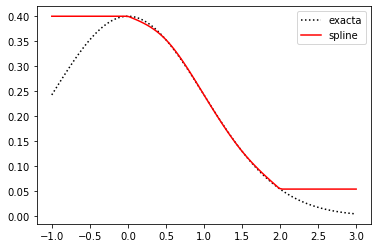

In [76]:
spline = [spline_eval( xi, coefs, puntosp ) for xi in x]  ##polinomio resultante que aproxima la funcion de gauss
plt.plot(x, normal_distribution(x, 0, 1), color="black", linestyle=":", label="exacta") ### funcion exacta de gauss
plt.plot(x, spline, color="red",linestyle="-", label="spline") ## spline
plt.legend()
plt.show()